# Intuition behind the Laplace transform

*TODO: finish visualizations and content*

*TODO: fix sine wave notations and frequencies for FFT*

By the end of this notebook, you should be able to:

- Use `numpy` to take the Fourier transform
- Get a better intuition of the Laplace transform and how it transforms a time domain signal to the frequency domain

## Definition
The Laplace transform is a mathematical operation that maps a function in the time domain $ f(t) $ to the complex frequency domain $ F(s) $.

In process control, the Laplace transform is commonly used as a tool to transform ordinary differential equations into algebraic problems in the `s` domain, where solutions can be easily found. But what exactly is this mysterious `s` frequency domain? The goal of this notebook is to provide some intuition behind the math of Laplace transforms.

The Laplace transform is defined as:

$$ F(s) = \mathcal{L}\{f(t)\} = \int^{\infty}_{0}{e^{-st}f(t) dt}$$

where $s$ is a complex variable with a real and imaginary part, $s = \sigma + i\omega$, as opposed to $t$, which is a real variable.

## In the beginning, there was the Fourier transform

The Fourier transform, if you can recall from your MATH 256, Differential Equations class, is a tool that breaks down a function into sinusoids. Recall further that the Fourier transform of a function $f(t)$ to the frequency domain $\omega$ is defined as follows:

$$ F(\omega) = \int^{\infty}_{-\infty}{e^{-i\omega t}f(t)dt}$$

Let's see that integral in action.

### Physics 101 Recap: Waves

Recall that a wave can be defined in terms of its amplitude, $A$, angular frequency, $\omega$ (in radians) and phase shift $\phi$ as:

$$ f(t) = A\sin{(\omega t + \phi)} $$ 

1. Since $\sin(x)$ is a periodic function, it'll go through one complete cycle every $360^\circ$ or $2\pi$ radians.
2. If $\phi=0$, $A\sin{(\omega t)}$ will go through one complete cycle when $\omega t = 2\pi$. We give this $t$ a special name, called the period, $T = \frac{2\pi}{\omega}$
3. The regular frequency (in Hz), can be found with $\omega = 2\pi f$ or $f = \frac{\omega}{2 \pi}$

### Example
Let's visualize this with a simple sine wave:

$$ f(t) = \sin{(2 \pi f t)} $$ 

Where $f = \frac{1}{2 \pi}$ Hz.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

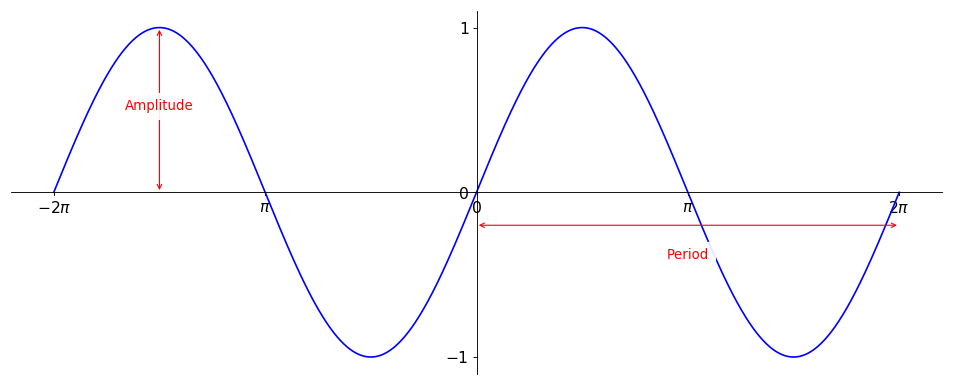

In [2]:
# our sine wave data
n_points = 1001
f = 1/(2*np.pi)
t=np.linspace(-2*np.pi,2*np.pi,n_points)
y=np.sin(2*np.pi*f*t)

plt.figure(figsize=(15,6), dpi=80)
plt.subplot(111)

# Some matplotlib tricks to display the x-axis as multiples of pi 
# https://www.labri.fr/perso/nrougier/teaching/matplotlib/
plt.plot(t, y, lw='1.5', color='b')
plt.xticks(
       [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi],
       [r'$-2\pi$', r'$\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']
)
plt.yticks([-1, 0, +1])

# Move the axes
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# arrow and text for period
plt.annotate('', xy = (0, -0.2),
    xytext = (2*np.pi, -0.2), arrowprops=dict(edgecolor='r', arrowstyle = '<->'))
plt.text(np.pi, -0.4, 'Period', color='r', fontsize=12, horizontalalignment='center',
         bbox={'edgecolor': 'white', 'facecolor':'white', 'alpha':0.9, 'pad':5})

# arrow and text for amplitude
plt.annotate('', xy = (-1.5*np.pi, 0),
    xytext = (-1.5*np.pi, 1), arrowprops=dict(edgecolor='r', arrowstyle = '<->'))
plt.text(-1.5*np.pi, 0.5, 'Amplitude', color='r', fontsize=12, horizontalalignment='center',
         bbox={'edgecolor': 'white', 'facecolor':'white', 'alpha':0.9, 'pad':5})

# Make labels bigger
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_bbox(dict(facecolor='white', edgecolor='None'))

### Sidenote: Python `matplotlib` tips

Take a closer look at how these are done:
1. Labeling plots with text and adjusting font size
2. Creating and positioning arrows
3. Labeling the x-axis in multiples of $\pi$
4. Moving the axes to start in the middle of the plot

### Python Example: Fourier transform on sine waves
We'll begin by adding 3 sine waves of known frequencies together:

$$ y = \sin{(2\pi \cdot ft)} + 2\cdot\sin{(2\pi \cdot 3ft)} + 3\cdot\sin{(2\pi \cdot 5ft)} $$

where $ f = \frac{1}{2\pi}$ Hz

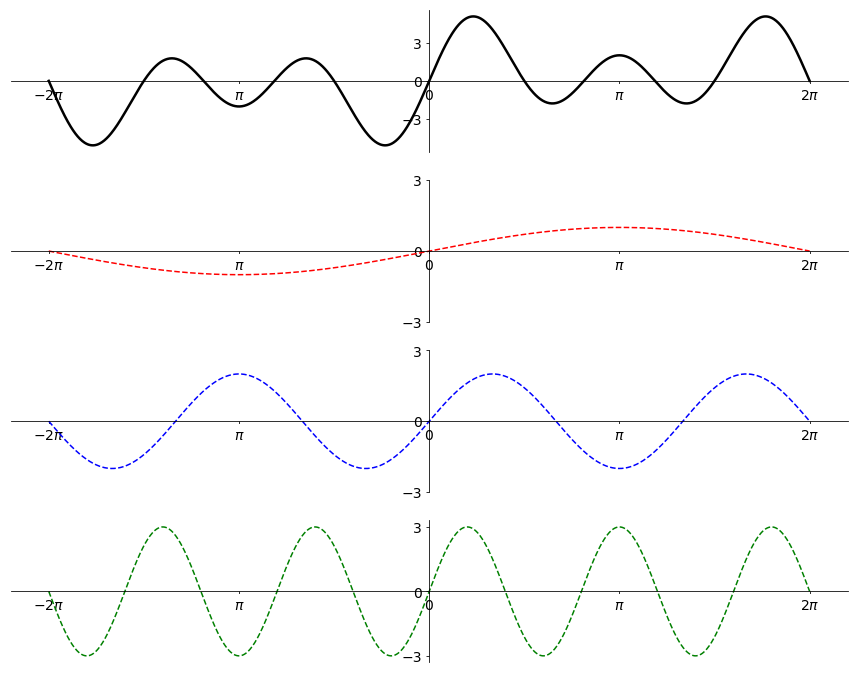

In [3]:
n_points = 1001
f = 1/(2*np.pi)
t=np.linspace(-2*np.pi,2*np.pi,n_points)
y=np.sin(2*np.pi*f*t)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15,12))

y1 = np.sin(1*np.pi*f*t)
y2 = 2*np.sin(3*np.pi*f*t)
y3 = 3*np.sin(5*np.pi*f*t)
y = y1 + y2 + y3
ax1.plot(t, y, '-k', lw=2.5)
ax2.plot(t, y1, '--r')
ax3.plot(t, y2, '--b')
ax4.plot(t, y3, '--g')
plt.xticks(
       [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi],
       [r'$-2\pi$', r'$\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']
)
# fix axes
for ax in [ax1, ax2, ax3, ax4]:
    # Move the axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
    # set yticks
    ax.set_yticks([-3, 0, +3])
    
    # Make labels bigger
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_bbox(dict(facecolor='white', edgecolor='None'))

** todo: ** 
1. animate decomposition of waves 
2. refactor plot settings code as a separate func to make this notebook cleaner

### Fourier Transform with numpy `fft`

The top most plot (black line) is the 3 sine waves added together. Using numpy's `fft` module to take the Fourier transform, we can actually recover the amplitude and frequencies of the individual sine waves.

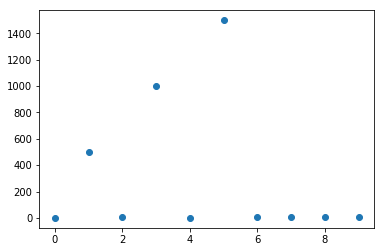

In [4]:
f = np.fft.fft(y)
freq = np.abs(f[0:10])
plt.scatter(range(len(freq)),freq, marker='o')

That looks about right. The Fourier transform gave us our original frequencies and amplitudes:

1. We have 3 peaks at $\omega = 1$ rad, $\omega = 3$ rad and $\omega = 5$ rad.
2. The amplitudes are 500, 1000 and 1500. Divide by their greatest common factor of 500 and we get our original amplitudes of 1, 2 and 3.

## Breaking down the Fourier transform

Let's take a closer look at the formula:

$$ F(\omega) = \int^{\infty}_{-\infty}{e^{-i\omega t}f(t)dt}$$

By Euler's identity, we know that the exponential can be broken down into a real cosine part and an imaginary sine part: 

$$e^{-i\omega t} = \cos{\omega t} - i\sin{\omega t}$$

Let's relate that back to the $ e^{-i\omega t} $ term in the integral. With some algebra, we can re-arrange Euler's identity to get the following formulas:

$$ \cos{(\omega t)} = \frac{1}{2}e^{i{(\omega)}t} + \frac{1}{2}e^{i{(-\omega)}t}$$

$$ \sin{(\omega t)} = \frac{1}{2i} e^{i{(\omega)}t} - \frac{1}{2i}e^{i{(-\omega)}t}$$

Knowing all that, let's try to break down that integral. [Reference](http://dmorris.net/projects/tutorials/fourier_tutorial.pdf)

### Stuff inside the integral
1. From Euler's identity, we can see that the $e^{i{\omega}t}$ term has 2 parts, where the real part is a cosine wave and the imaginary part is a sine wave, with frequencies of $\omega$.
2. Look at the stuff inside the integral, $e^{-i\omega t}f(t)$. Another way of writing the negative exponential would be:
$$\frac{f(t)}{e^{i\omega t}}$$
3. Here's the interesting part:
    - To determine the amount of $x$'s in a certain quantity, $y$, we would divide $y$ by $x$.
    - For example, we can get the number $250$ by combining 25 tens through multiplication. In other words, $y/x$ =  250/10 = 25. There are 25 $x=10$ in $y=250$.
    - Now let's go back to our equation and apply the same concept, $y=f(t)$ and $x=e^{i\omega t}$. This would tell us how much cosine and sine waves of frequency $\omega$ is in our signal $f(t)$.
$$ \text{Amount of signal with frequency } \omega \text{ in } f(t) = \frac{f(t)}{e^{i\omega t}} $$ 
4. [Here's another way](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT4/node2.html) to think of this concept.
    - The Fourier transform is decomposing a function into a sum of orthogonal basis functions.
    - Thi is the same as decomposing a point in 3D space into the sum of its basis vector components, $i,j,k$.
5. **TODO finish explanation for integral: $ F(\omega) = \int^{\infty}_{-\infty}{\text{stuff } dt}$**

**Note:**

1. As mentioned in the [original reference](http://dmorris.net/projects/tutorials/fourier_tutorial.pdf), this is a hand-wavy, non-rigorous explanation of the Fourier transform which ignores some complexities like phases and complex numbers. This is, however, good enough for our purpose of getting an intuitive sense of what the transform is doing.

## The Laplace transform as a generalized Fourier transform


The Laplace transform breaks a function down into sinusoids **and also exponentials**.

Further Reading:

- Brian Douglas video: https://www.youtube.com/watch?v=ZGPtPkTft8g
- http://dmorris.net/projects/tutorials/fourier_tutorial.pdf
- DSP Guide on The Laplace Transform: http://www.dspguide.com/CH32.PDF
- A filter primer: https://www.maximintegrated.com/en/app-notes/index.mvp/id/733
- Great tutorial on matplotlib - https://www.labri.fr/perso/nrougier/teaching/matplotlib/#introduction
- Laplace graphical - http://users.encs.concordia.ca/home/a/amer/teach/elec364/notes/LaplaceTransform.pdf